In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./dataset/train.csv') 
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
#Missing Values
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [3]:
unique_values = {col: df[col].unique() for col in df.columns}

unique_values

{'PassengerId': array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
        '9280_02'], dtype=object),
 'HomePlanet': array(['Europa', 'Earth', 'Mars', nan], dtype=object),
 'CryoSleep': array([False, True, nan], dtype=object),
 'Cabin': array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
       dtype=object),
 'Destination': array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object),
 'Age': array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
        48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
        47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
        36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
        67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
        79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
        69., 72., 77.]),
 'VIP': array([False, True, nan], dtype=object),
 'RoomService': array([   0.,  109.,   4

In [4]:
#Fill in missing data for numerical values using median
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
        df[col] = df[col].fillna(df[col].median())

In [5]:
#Droppin ID and name
df.drop(['PassengerId','Name'], axis=1, inplace=True)

In [6]:

#Encode unknown class
unknown_class_columns = ['HomePlanet','CryoSleep','Cabin','VIP']

df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

df[unknown_class_columns] = df[unknown_class_columns].fillna('Unknown')

df.isna().sum()


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [7]:
columns_to_encode = ['HomePlanet','Destination', 'CryoSleep','VIP']

df = pd.get_dummies(df,columns=columns_to_encode, drop_first=True)



In [8]:
#Target encoding for Cabin
# target_mean = df.groupby('Cabin')['Transported'].mean()
# df['Cabin'] = df['Cabin'].map(target_mean)

# df[['Cabin','Transported']]

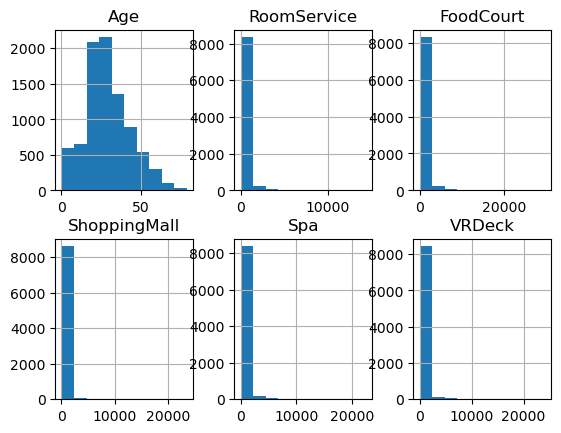

In [9]:
#Check distributions of numeric data
from matplotlib import pyplot as plt

numerical_columns = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].name != 'Cabin':  # Check if the column is numerical
        numerical_columns.append(df[col].name)

numerical_df = df[numerical_columns]

numerical_df.hist(layout=(2, 3))
plt.show()

In [10]:
#Transform the data
def transform_to_normal(df:pd.DataFrame):

    numerical_columns = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64'] and df[col].name != 'Cabin':  # Check if the column is numerical
            numerical_columns.append(df[col].name)

    for col in df.columns:
        if col in columns_to_transform and col != 'Age':
            df[col] = np.log(df[col]+1)

    return df


columns_to_transform:list = numerical_columns

print(numerical_columns)

numerical_df = transform_to_normal(numerical_df)


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


/var/folders/0r/b5q635yn4bd0y1jbq55llxcc0000gn/T/ipykernel_5742/3669452635.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log(df[col]+1)


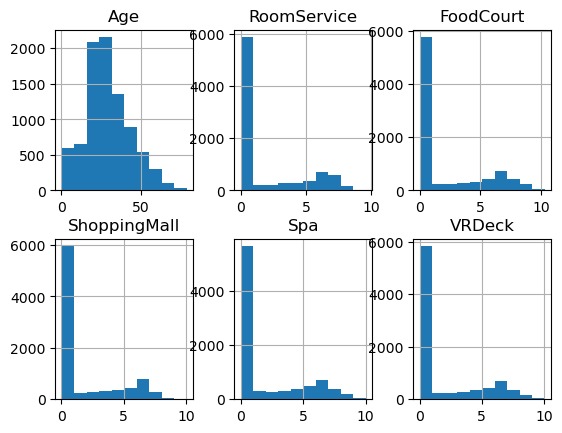

In [11]:
numerical_df.hist(layout=(2, 3))
plt.show()

In [12]:
#Merge DFs
for col in numerical_df.columns:
    df[col] = numerical_df[col]


print(df.columns)


Index(['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_Unknown', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CryoSleep_True', 'CryoSleep_Unknown',
       'VIP_True', 'VIP_Unknown'],
      dtype='object')


In [13]:
#Encode binary data

def encode_to_binary(df:pd.DataFrame):
    #df['CryoSleep'] = df['CryoSleep'].map({True: 1, False: 0})
    #df['VIP'] = df['VIP'].map({True: 1, False: 0})

    bool_cols = df.select_dtypes(include=['bool']).columns
    df[bool_cols] = df[bool_cols].astype(int)


    X = df.drop(['Transported','Cabin'], axis = 1)
    y = df['Transported']

    return (X,y)

X,y = encode_to_binary(df)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [15]:
import statsmodels.api as sm

X_train_logistic = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train_logistic).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.490688
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Transported   No. Observations:                 6954
Model:                          Logit   Df Residuals:                     6938
Method:                           MLE   Df Model:                           15
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:                  0.2921
Time:                        16:07:23   Log-Likelihood:                -3412.2
converged:                       True   LL-Null:                       -4820.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4458      0.110      4.055      0.000       0.

In [16]:
#Test model
from sklearn.metrics import balanced_accuracy_score

X_test_logistic = sm.add_constant(X_test)
y_pred = model.predict(X_test_logistic)

y_pred = np.where(y_pred > 0.5, 1, 0)

score = balanced_accuracy_score(y_test, y_pred)

print('Balanced Accuracy Score:',score)


Balanced Accuracy Score: 0.7669983251708563


In [17]:
#Read testing data

test_df = pd.read_csv('./dataset/test.csv')

#Fill in missing data for numerical values using median
for col in test_df.columns:
    if test_df[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
        test_df[col] = test_df[col].fillna(df[col].median())


test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [18]:
#Droppin ID and name
id = test_df['PassengerId']
test_df.drop(['PassengerId','Name'], axis=1, inplace=True)

In [19]:
numerical_columns = []

for col in test_df.columns:
    if test_df[col].dtype in ['int64', 'float64'] and test_df[col].name != 'Cabin':  # Check if the column is numerical
        numerical_columns.append(test_df[col].name)

numerical_test_df = df[numerical_columns]

numerical_test_df = transform_to_normal(numerical_test_df)



#Encode unknown class
unknown_class_columns = ['HomePlanet','CryoSleep','Cabin','VIP']

test_df['Destination'] = test_df['Destination'].fillna(test_df['Destination'].mode()[0])

test_df[unknown_class_columns] = test_df[unknown_class_columns].fillna('Unknown')

test_df.isna().sum()

/var/folders/0r/b5q635yn4bd0y1jbq55llxcc0000gn/T/ipykernel_5742/3669452635.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log(df[col]+1)


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [20]:
columns_to_encode = ['HomePlanet','Destination','CryoSleep','VIP']

test_df = pd.get_dummies(test_df,columns=columns_to_encode, drop_first=True)

# #Transform the data
# test_numerical_df = transform_to_normal(numerical_test_df)

In [21]:
#Merge DFs
for col in numerical_test_df.columns:
    test_df[col] = numerical_test_df[col]


print(test_df.columns)

Index(['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Unknown',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'CryoSleep_True', 'CryoSleep_Unknown', 'VIP_True', 'VIP_Unknown'],
      dtype='object')


In [22]:
def encode_to_binary(test_df:pd.DataFrame):
    #test_df['CryoSleep'] = test_df['CryoSleep'].map({True: 1, False: 0})
    #test_df['VIP'] = test_df['VIP'].map({True: 1, False: 0})

    bool_cols = test_df.select_dtypes(include=['bool']).columns
    test_df[bool_cols] = test_df[bool_cols].astype(int)


    X = test_df.drop(['Cabin'], axis = 1)

    return X

X_test_set = encode_to_binary(test_df)

X_test_set

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,CryoSleep_Unknown,VIP_True,VIP_Unknown
0,39.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0
1,24.0,1.740550,1.194706,1.448822,1.989232,1.570003,0,0,0,0,1,0,0,0,0
2,58.0,1.565317,2.217276,0.000000,2.283631,1.591686,1,0,0,0,0,1,0,0,0
3,33.0,0.000000,2.098967,1.934256,2.209453,1.835435,1,0,0,0,1,0,0,0,0
4,16.0,1.904646,1.660640,1.795732,1.993147,0.741276,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,42.0,0.000000,0.526589,0.000000,1.358505,2.125730,0,0,0,0,1,1,0,0,0
4273,28.0,0.000000,1.824307,1.980731,0.000000,0.000000,0,0,0,0,1,0,0,0,0
4274,43.0,1.935801,1.730662,2.151343,1.528427,0.000000,0,1,0,0,0,1,0,0,0
4275,55.0,0.000000,1.728949,0.000000,1.891788,2.260262,1,0,0,0,1,0,0,0,0


In [23]:
X_test_set_logistic = sm.add_constant(X_test_set)
pred = model.predict(X_test_set_logistic)

pred = np.where(pred > 0.5, 1, 0)



In [28]:
#Merge with patient ids

result = pd.DataFrame(columns=['PassengerId','Transported'])

pred_series = pd.Series(pred)

result['PassengerId'] = id
result['Transported'] = pred_series.astype(bool)


In [29]:
#Export to CSV
result.to_csv('result.csv',index=False)